### train_data 구축 단계에서는 아래 한국어 감성 데이터를 사용하여 전처리 및 모델학습 준비단계를 거친다

* 네이버 쇼핑 제품별 후기 (naver_shopping.txt) // 별점 데이터이기 때문에 별점을 기준으로 긍정과 부정을 분류하도록 한다.
* 한국어 단발성 대화 데이터셋(ko_emo.xlsx) // 7가지 감정이 부여되어 있는 문장에 대해 감정 별로 긍정과 부정을 나누고 모델학습을 위한 준비를 한다.




In [2]:
import pandas as pd
import numpy as np

In [3]:
# naver_shopping.txt
# 네이버 쇼핑에서 제품별 후기를 별점과 함께 수집한 데이터
# 부정(1 ~ 2점)과 긍정(4 ~ 5점)의 비율이 1:1에 가깝도록 샘플링 / 3점은 없음
total_data = pd.read_table('../data/model_train/naver_shopping.txt', names=['ratings', 'Sentence'])
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [4]:
# 부정(1~2점): -1 / 긍정(4~5점) : 1
total_data['Emotion'] = np.select([total_data.ratings > 3], [1], default=-1)
total_data[:5]

,ratings,Sentence,Emotion
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,-1
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,-1
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


In [5]:
# drop_duplicates: 내용이 중복되는 행을 제거
total_data.drop_duplicates(subset=['Sentence'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 199908


In [6]:
# isnull().values.any(): series의 결측값 개수 확인하기
print(total_data.isnull().values.any())

False


In [7]:
# ['ratings'] column 제거
total_data.drop(['ratings'], axis = 'columns', inplace = True)

In [8]:
total_data

,Sentence,Emotion
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,-1
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,-1
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...
199995,장마라그런가!!! 달지않아요,-1
199996,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,넘이쁘고 쎄련되보이네요~,1


In [10]:
# 한국어_단발성_대화_데이터셋
# 7개 감정(기쁨, 슬픔, 놀람, 분노, 공포, 혐오, 중립)으로 레이블링
chatbot_data = pd.read_excel('../data/model_train/ko_emo.xlsx', usecols = 'A:B')

In [11]:
chatbot_data

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [12]:
# 부정('공포', '놀람', '분노', '슬픔',' 혐오) : -1
# 중립('중립') : 0
# 긍정('행복') : 1
chatbot_data.loc[(chatbot_data['Emotion'] == '공포'), 'Emotion'] = -1
chatbot_data.loc[(chatbot_data['Emotion'] == '놀람'), 'Emotion'] = -1
chatbot_data.loc[(chatbot_data['Emotion'] == '분노'), 'Emotion'] = -1
chatbot_data.loc[(chatbot_data['Emotion'] == '슬픔'), 'Emotion'] = -1
chatbot_data.loc[(chatbot_data['Emotion'] == '중립'), 'Emotion'] = 0
chatbot_data.loc[(chatbot_data['Emotion'] == '행복'), 'Emotion'] = 1
chatbot_data.loc[(chatbot_data['Emotion'] == '혐오'), 'Emotion'] = -1

In [13]:
chatbot_data

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,-1
1,그냥 내 느낌일뿐겠지?,-1
2,아직너무초기라서 그런거죠?,-1
3,유치원버스 사고 낫다던데,-1
4,근데 원래이런거맞나요,-1
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,-1
38590,재미가 없으니 망하지,-1
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,-1
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,-1


In [14]:
chatbot_data['Sentence'].nunique(), chatbot_data['Emotion'].nunique()

(38509, 3)

In [15]:
chatbot_data.drop_duplicates(subset=['Sentence'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(chatbot_data))

총 샘플의 수 : 38509


In [16]:
df = pd.concat([total_data,chatbot_data])
df

,Sentence,Emotion
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,-1
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,-1
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,-1
38590,재미가 없으니 망하지,-1
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,-1
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,-1


In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
okt = Okt()

In [18]:
df.reset_index(drop=True, inplace=True)

In [19]:
# 부정: -1, 중립: 0, 긍정: 1 개수 확인
print(df.groupby('Emotion').size().reset_index(name='count'))

   Emotion   count
0       -1  127634
1        0    4827
2        1  105956


<Axes: >

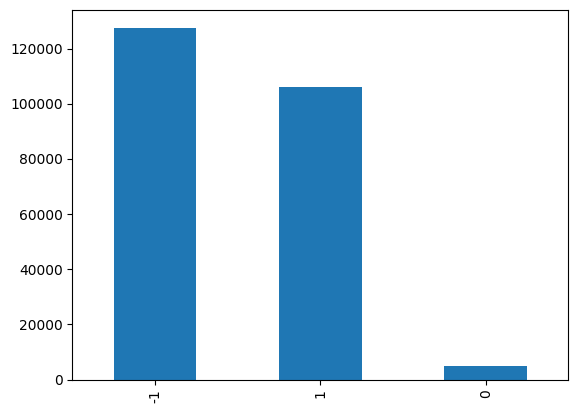

In [20]:
df['Emotion'].value_counts().plot(kind='bar')

In [25]:
# 불용어
f = open('../data/model_train/stopwords-ko.txt', 'r') #'r'은 읽기 모드
stopwords = f.read().split('\n')

In [26]:
# okt.morphs(): 텍스트를 형태소 단위로 나눈다
# 불용어 제거
# cnt: 진행 정도를 확인하기 위해 설정(2000개 단위)
df_processing = []
cnt = 0

for sentence in df['Sentence']:
  if cnt%2000==0:
        print(cnt)
  cnt = cnt +1
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True)
  temp_X = [word for word in temp_X if not word in stopwords]
  df_processing.append(temp_X)

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
190000
192000
194000
196000
198000
200000
202000
204000
206000
208000
210000
212000
214000
216000
218000
220000
222000
224000
226000
228000
230000
232000
234000
236000
238000


In [27]:
df_processing[:3]

[['배공', '빠르다', '굿'],
 ['택배', '엉망', '이네', '용', '집', '밑', '층', '말', '도', '없이', '놔두다'],
 ['아주',
  '좋다',
  '바지',
  '정말',
  '좋다',
  '개',
  '더',
  '구매',
  '하다',
  '가격',
  '대박',
  '이다',
  '바느질',
  '엉',
  '성하다',
  '편하다',
  '가성',
  '비',
  '최고',
  '예요']]

In [28]:
df['Processing'] = df_processing

In [29]:
df.head()

,Sentence,Emotion,Processing
0,배공빠르고 굿,1,"[배공, 빠르다, 굿]"
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,-1,"[택배, 엉망, 이네, 용, 집, 밑, 층, 말, 도, 없이, 놔두다]"
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1,"[아주, 좋다, 바지, 정말, 좋다, 개, 더, 구매, 하다, 가격, 대박, 이다,..."
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,-1,"[선물, 용, 빨리, 받다, 전달, 하다, 하다, 상품, 이다, 머그컵, 만, 오다..."
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,"[민트, 색상, 예쁘다, 옆, 손잡이, 는, 거, 는, 용, 도로, 도, 사용, 되..."


문장의 형태소 최대 개수 :  112
문장의 형태소 평균 개수 :  11.568227097899898


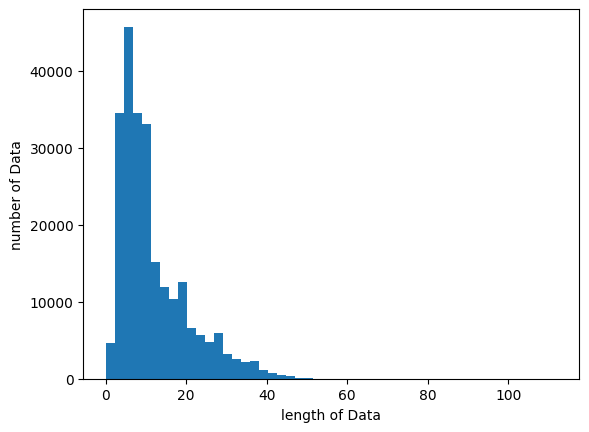

In [30]:
print("문장의 형태소 최대 개수 : ", max(len(l) for l in df_processing))
print("문장의 형태소 평균 개수 : ", sum(map(len,df_processing))/ len(df_processing))
plt.hist([len(s) for s in df_processing], bins=50) # bins 가로축 구간의 개수
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [31]:
# 문장의 형태소 개수
df_len = []

for l in df_processing:
   df_len.append( len(l))

In [32]:
df['Length'] = df_len

In [33]:
# 문장의 형태소 개수 30개 이하만 추출
df = df[df.Length <= 30]

In [34]:
df.reset_index(drop=True, inplace=True)
df

,Sentence,Emotion,Processing,Length
0,배공빠르고 굿,1,"[배공, 빠르다, 굿]",3
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,-1,"[택배, 엉망, 이네, 용, 집, 밑, 층, 말, 도, 없이, 놔두다]",11
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1,"[아주, 좋다, 바지, 정말, 좋다, 개, 더, 구매, 하다, 가격, 대박, 이다,...",20
3,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1,"[민트, 색상, 예쁘다, 옆, 손잡이, 는, 거, 는, 용, 도로, 도, 사용, 되...",14
4,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,-1,"[비추다, 하다, 계란, 뒤지다, 완전, 불편하다, ㅠㅠ, 코팅, 도, 묻다, 보기...",21
...,...,...,...,...
227039,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,-1,"[솔직하다, 예보, 제대로, 못, 하다, 데, 세금, 이라도, 아끼다, 그냥, 폐지...",13
227040,재미가 없으니 망하지,-1,"[재미, 없다, 망하다]",3
227041,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,-1,"[공장, 도시락, 비우다, 생, 적임, 아르바이트, 하다, 화장실, 가성, 손, 도...",20
227042,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,-1,"[코딱지, 만, 한, 나라, 지다, 들다, 끼리, 피터지다, 싸우다, 세다, 징, ...",13


문장의 형태소 최대 개수 :  30
문장의 형태소 평균 개수 :  12.14769824351227


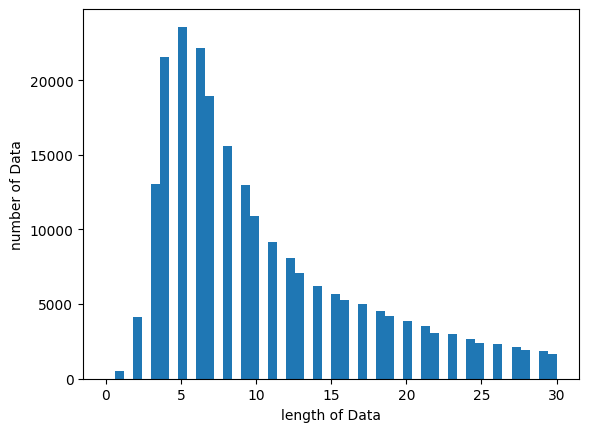

In [35]:
print("문장의 형태소 최대 개수 : ", max(len(l) for l in df['Processing']))
print("문장의 형태소 평균 개수 : ", sum(map(len,df_processing))/ len(df['Processing']))
plt.hist([len(s) for s in df['Processing']], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [36]:
# csv 형식으로 저장
df.to_csv('../data/model_train/정제데이터.csv', encoding = 'utf-8', index=False)